In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#cargar archivo desde seaborn 
df=pd.read_csv('Malta_limpio.csv')
#eliminamos la columna unnamed 
df= df.drop(['Unnamed: 0'], axis=1)
df.head(5)

,listing_url,name,description,neighborhood_overview,picture_url,host_name,host_since,host_response_time,host_response_rate,host_is_superhost,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,https://www.airbnb.com/rooms/50188,Cosy fully renovated farmhouse Gozo,Xewkija is a small village found on the island...,"Felix the butcher , the bakery and the mini ma...",https://a0.muscache.com/pictures/39216710/b3fa...,Alexandra,2015-09-29,Desconocido,-%,f,...,4.83,4.95,4.95,4.62,4.79,1.0,1.0,0.0,0.0,1.32
1,https://www.airbnb.com/rooms/53723,Studio apartment Apt.3,A tastefully converted open plan apartment who...,"Located right in the heart of Valletta, a worl...",https://a0.muscache.com/pictures/1eeb37c2-16f6...,Michael,2010-10-02,within a few hours,100%,t,...,4.79,4.95,4.97,4.97,4.69,4.0,4.0,0.0,0.0,1.09
2,https://www.airbnb.com/rooms/102120,4 Bedroom Family-run House with Pool,Air conditioning in 3 bedrooms (on a pay-per-u...,The village square is just a few minutes away....,https://a0.muscache.com/pictures/prohost-api/H...,Michael,2011-04-25,within an hour,94%,t,...,4.59,4.89,4.93,4.52,4.80,7.0,7.0,0.0,0.0,0.31
3,https://www.airbnb.com/rooms/109123,Penthouse Apartment.,Our place is located in a small town called Na...,I can tell where the best places are for break...,https://a0.muscache.com/pictures/724159/6277e4...,Lino And Rose,2011-05-05,within an hour,100%,t,...,4.86,4.96,4.94,4.82,4.90,3.0,3.0,0.0,0.0,0.79
4,https://www.airbnb.com/rooms/113998,Residence Rouge™ 1 Floriana Valletta.,Hi and welcome to Residence Rouge.<br />Our 20...,No se proporcionan detalles,https://a0.muscache.com/pictures/744058/a7f0aa...,Alan,2011-05-11,a few days or more,13%,f,...,4.78,4.84,4.91,4.80,4.69,7.0,7.0,0.0,0.0,1.25


In [3]:
f1=df.iloc[ :  , [8,9,10,12,13,21,27,28,31,42] ]
f1

,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
0,-%,f,t,Entire villa,Entire home/apt,f,6.0,2.5,160.0,4.83
1,100%,t,t,Entire rental unit,Entire home/apt,f,2.0,1.0,100.0,4.79
2,94%,t,t,Entire home,Entire home/apt,f,8.0,1.4,83.0,4.59
3,100%,t,t,Entire rental unit,Entire home/apt,f,4.0,1.0,55.0,4.86
4,13%,f,t,Entire rental unit,Entire home/apt,f,2.0,1.0,49.0,4.78
...,...,...,...,...,...,...,...,...,...,...
12604,100%,f,t,Entire rental unit,Entire home/apt,t,5.0,2.0,157.0,5.00
12605,94%,t,t,Private room in home,Private room,f,2.0,1.0,50.0,5.00
12606,100%,f,t,Entire rental unit,Entire home/apt,t,4.0,1.0,85.0,5.00
12607,100%,t,t,Entire rental unit,Entire home/apt,t,6.0,2.0,128.0,5.00


In [4]:
#convertimos string a tipos numéricos
f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0, 't': 1})
f1['host_identity_verified'] = f1['host_identity_verified'].replace({'f': 0, 't': 1})
f1['instant_bookable'] = f1['instant_bookable'].replace({'f': 0, 't': 1})

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
f1['property_type'] = encoder.fit_transform(f1['property_type'])

f1['host_response_rate'] = f1['host_response_rate'].astype(str).str.rstrip('%')
f1['host_response_rate'] = pd.to_numeric(f1['host_response_rate'], errors='coerce').fillna(0)

f1['room_type'] = f1['room_type'].map({
    'Entire home/apt': 1,
    'Private room': 2,
    'Shared room': 3,
    'Hotel room': 4
})

C:\Users\valer\AppData\Local\Temp\ipykernel_40380\3436113170.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0, 't': 1})
C:\Users\valer\AppData\Local\Temp\ipykernel_40380\3436113170.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0, 't': 1})
C:\Users\valer\AppData\Local\Temp\ipykernel_40380\3436113170.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be remo

In [5]:
#f2 = Entire home/apt
f2= f1[(f1["room_type"] == 1)]

In [6]:
f2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8902 entries, 0 to 12608
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_response_rate         8902 non-null   float64
 1   host_is_superhost          8902 non-null   int64  
 2   host_identity_verified     8902 non-null   int64  
 3   property_type              8902 non-null   int64  
 4   room_type                  8902 non-null   int64  
 5   instant_bookable           8902 non-null   int64  
 6   accommodates               8902 non-null   float64
 7   bathrooms                  8902 non-null   float64
 8   price                      8902 non-null   float64
 9   review_scores_cleanliness  8902 non-null   float64
dtypes: float64(5), int64(5)
memory usage: 765.0 KB


<Axes: xlabel='room_type', ylabel='price'>

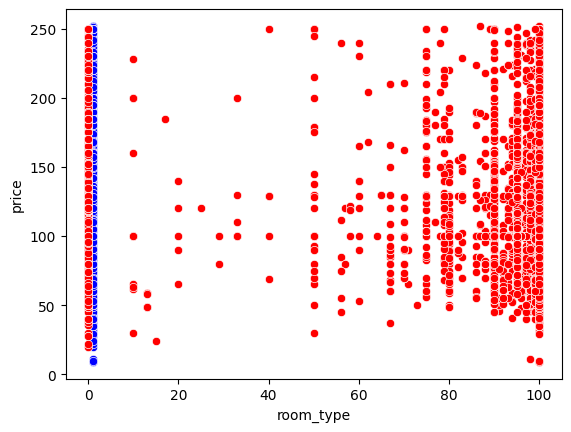

In [7]:
#imprimimos el scatter plot entre la variable dependiente total e independiente (a)
from turtle import color 
sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='host_response_rate', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

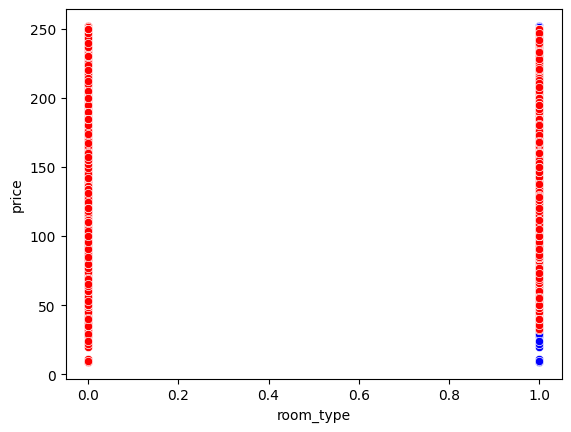

In [8]:
from turtle import color 
sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='host_is_superhost', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

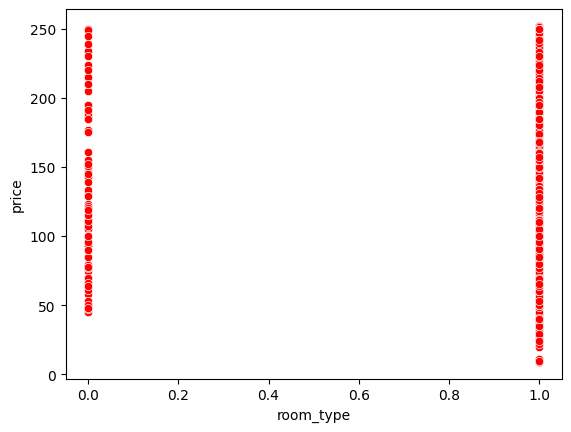

In [9]:
from turtle import color 
sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='host_identity_verified', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

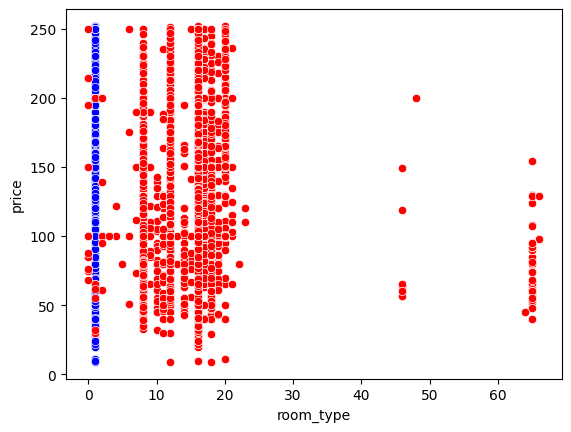

In [10]:
from turtle import color 
sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='property_type', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

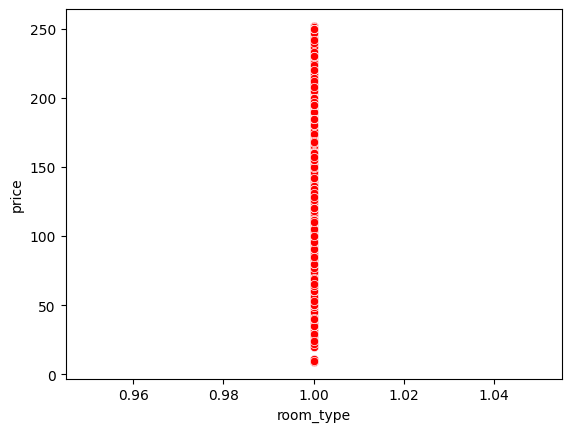

In [11]:
from turtle import color 
sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='room_type', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

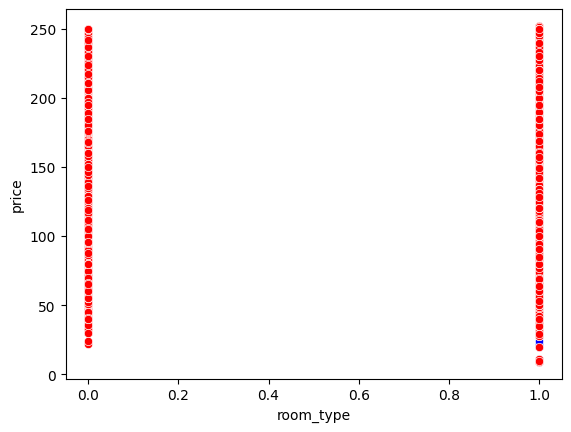

In [12]:
from turtle import color 
sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='instant_bookable', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

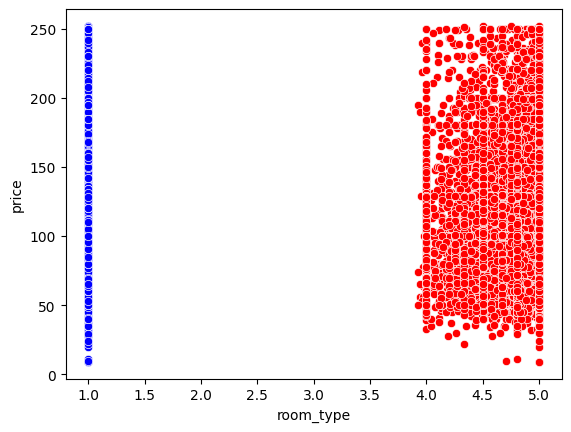

In [13]:
from turtle import color 
sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='review_scores_cleanliness', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='accommodates'>

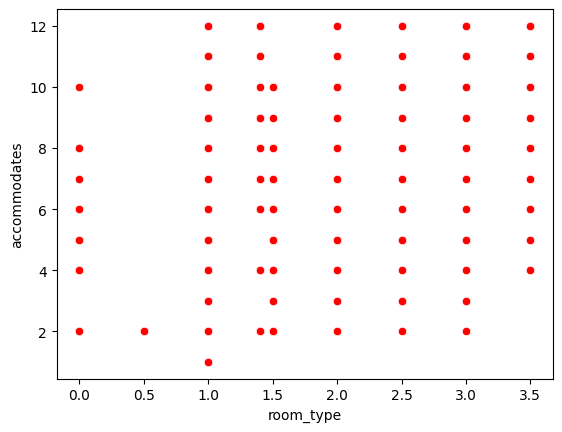

In [14]:
from turtle import color 
sns.scatterplot(x='room_type', y='accommodates', color='blue', data=f2)
sns.scatterplot(x='bathrooms', y='accommodates', color='red', data=f2)

In [15]:
#declaración de las variables independientes que se van a comparar con el precio 
Var_Indep= f2[['host_response_rate']]
Var_Indep2=f2[['host_is_superhost']]
Var_Indep3=f2[['room_type']]
Var_Indep4=f2[['host_identity_verified']]
Var_Indep5= f2[['property_type']]
Var_Indep6= f2[['instant_bookable']]
Var_Indep7= f2[['review_scores_cleanliness']]
#declaración de variable independiente para accommodates 
Var_Indep8= f2[['bathrooms']]

In [16]:
#variables independientes para la regresión lineal
Var_Dep= f2['price']
Var_Dep2= f2['accommodates']

In [17]:
#se define model como función de regresión lineal 
from sklearn.linear_model import LinearRegression 
model=LinearRegression()
model2=LinearRegression()
model3=LinearRegression()
model4=LinearRegression()
model5=LinearRegression()
model6=LinearRegression()
model7=LinearRegression()
model8=LinearRegression()

In [18]:
#verficamos la función relacionada al modelo 
type(model)
type(model2)
type(model3)
type(model4)
type(model5)
type(model6)
type(model7)
type(model8)

sklearn.linear_model._base.LinearRegression

In [19]:
#ajustamos el modelo con las variables antes declaradas
model.fit(X=Var_Indep, y=Var_Dep)
model2.fit(X=Var_Indep2, y=Var_Dep)
model3.fit(X=Var_Indep3, y=Var_Dep)
model4.fit(X=Var_Indep4, y=Var_Dep)
model5.fit(X=Var_Indep5, y=Var_Dep)
model6.fit(X=Var_Indep6, y=Var_Dep)
model7.fit(X=Var_Indep7, y=Var_Dep)
model8.fit(X=Var_Indep8, y=Var_Dep2)

LinearRegression()

In [20]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.10035412]),
 'rank_': 1,
 'singular_': array([2952.2647403]),
 'intercept_': np.float64(122.84317412895393)}

In [21]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-1.0162811]),
 'rank_': 1,
 'singular_': array([43.4927887]),
 'intercept_': np.float64(114.43065587044534)}

In [22]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model3.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['room_type'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.]),
 'rank_': 0,
 'singular_': array([0.]),
 'intercept_': np.float64(114.11933273421702)}

In [23]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model4.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_identity_verified'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-17.06997719]),
 'rank_': 1,
 'singular_': array([10.74533646]),
 'intercept_': np.float64(130.9649572649568)}

In [24]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model5.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['property_type'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.17525366]),
 'rank_': 1,
 'singular_': array([413.64548951]),
 'intercept_': np.float64(116.83088210445828)}

In [25]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model6.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['instant_bookable'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-1.36568734]),
 'rank_': 1,
 'singular_': array([45.39258964]),
 'intercept_': np.float64(114.98811361531338)}

In [26]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model7.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([9.57623735]),
 'rank_': 1,
 'singular_': array([25.30253376]),
 'intercept_': np.float64(68.47359820039611)}

In [27]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model8.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathrooms'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([1.69653702]),
 'rank_': 1,
 'singular_': array([59.19718434]),
 'intercept_': np.float64(2.100780470635498)}

**Prediccion de valores**

In [28]:
#predecimos valores
y_pred= model.predict(X=f2[['host_response_rate']])
y_pred

array([122.84317413, 112.80776236, 113.40988707, ..., 112.80776236,
       112.80776236, 112.80776236], shape=(8902,))

In [29]:
#predecimos valores
y_pred2= model2.predict(X=f2[['host_is_superhost']])
y_pred2

array([114.43065587, 113.41437477, 113.41437477, ..., 114.43065587,
       113.41437477, 114.43065587], shape=(8902,))

In [30]:
#predecimos valores
y_pred3= model3.predict(X=f2[['room_type']])
y_pred3

array([114.11933273, 114.11933273, 114.11933273, ..., 114.11933273,
       114.11933273, 114.11933273], shape=(8902,))

In [31]:
#predecimos valores
y_pred4= model4.predict(X=f2[['host_identity_verified']])
y_pred4

array([113.89498008, 113.89498008, 113.89498008, ..., 113.89498008,
       113.89498008, 113.89498008], shape=(8902,))

In [32]:
#predecimos valores
y_pred5= model5.predict(X=f2[['property_type']])
y_pred5

array([113.32580888, 114.02682353, 114.72783817, ..., 114.02682353,
       114.02682353, 114.02682353], shape=(8902,))

In [33]:
#predecimos valores
y_pred6= model6.predict(X=f2[['instant_bookable']])
y_pred6

array([114.98811362, 114.98811362, 114.98811362, ..., 113.62242628,
       113.62242628, 114.98811362], shape=(8902,))

In [34]:
y_pred7= model7.predict(X=f2[['review_scores_cleanliness']])
y_pred7

array([114.72682462, 114.34377512, 112.42852765, ..., 116.35478497,
       116.35478497, 116.35478497], shape=(8902,))

In [35]:
y_pred8= model8.predict(X=f2[['bathrooms']])
y_pred8

array([6.34212301, 3.79731749, 4.4759323 , ..., 3.79731749, 5.49385451,
       5.49385451], shape=(8902,))

In [36]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(0, 'Prediccion_host_response_rate', y_pred)
f2

,Prediccion_host_response_rate,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
0,122.843174,0.0,0,1,20,1,0,6.0,2.5,160.0,4.83
1,112.807762,100.0,1,1,16,1,0,2.0,1.0,100.0,4.79
2,113.409887,94.0,1,1,12,1,0,8.0,1.4,83.0,4.59
3,112.807762,100.0,1,1,16,1,0,4.0,1.0,55.0,4.86
4,121.538571,13.0,0,1,16,1,0,2.0,1.0,49.0,4.78
...,...,...,...,...,...,...,...,...,...,...,...
12603,112.807762,100.0,0,1,16,1,1,5.0,2.0,155.0,5.00
12604,112.807762,100.0,0,1,16,1,1,5.0,2.0,157.0,5.00
12606,112.807762,100.0,0,1,16,1,1,4.0,1.0,85.0,5.00
12607,112.807762,100.0,1,1,16,1,1,6.0,2.0,128.0,5.00


In [37]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(1, 'Prediccion_host_is_superhost', y_pred2)
f2

,Prediccion_host_response_rate,Prediccion_host_is_superhost,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
0,122.843174,114.430656,0.0,0,1,20,1,0,6.0,2.5,160.0,4.83
1,112.807762,113.414375,100.0,1,1,16,1,0,2.0,1.0,100.0,4.79
2,113.409887,113.414375,94.0,1,1,12,1,0,8.0,1.4,83.0,4.59
3,112.807762,113.414375,100.0,1,1,16,1,0,4.0,1.0,55.0,4.86
4,121.538571,114.430656,13.0,0,1,16,1,0,2.0,1.0,49.0,4.78
...,...,...,...,...,...,...,...,...,...,...,...,...
12603,112.807762,114.430656,100.0,0,1,16,1,1,5.0,2.0,155.0,5.00
12604,112.807762,114.430656,100.0,0,1,16,1,1,5.0,2.0,157.0,5.00
12606,112.807762,114.430656,100.0,0,1,16,1,1,4.0,1.0,85.0,5.00
12607,112.807762,113.414375,100.0,1,1,16,1,1,6.0,2.0,128.0,5.00


In [38]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(2, 'Prediccion_room_type', y_pred3)
f2

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_room_type,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
0,122.843174,114.430656,114.119333,0.0,0,1,20,1,0,6.0,2.5,160.0,4.83
1,112.807762,113.414375,114.119333,100.0,1,1,16,1,0,2.0,1.0,100.0,4.79
2,113.409887,113.414375,114.119333,94.0,1,1,12,1,0,8.0,1.4,83.0,4.59
3,112.807762,113.414375,114.119333,100.0,1,1,16,1,0,4.0,1.0,55.0,4.86
4,121.538571,114.430656,114.119333,13.0,0,1,16,1,0,2.0,1.0,49.0,4.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12603,112.807762,114.430656,114.119333,100.0,0,1,16,1,1,5.0,2.0,155.0,5.00
12604,112.807762,114.430656,114.119333,100.0,0,1,16,1,1,5.0,2.0,157.0,5.00
12606,112.807762,114.430656,114.119333,100.0,0,1,16,1,1,4.0,1.0,85.0,5.00
12607,112.807762,113.414375,114.119333,100.0,1,1,16,1,1,6.0,2.0,128.0,5.00


In [39]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(3, 'Prediccion_host_identity_verified', y_pred4)
f2

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_room_type,Prediccion_host_identity_verified,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
0,122.843174,114.430656,114.119333,113.89498,0.0,0,1,20,1,0,6.0,2.5,160.0,4.83
1,112.807762,113.414375,114.119333,113.89498,100.0,1,1,16,1,0,2.0,1.0,100.0,4.79
2,113.409887,113.414375,114.119333,113.89498,94.0,1,1,12,1,0,8.0,1.4,83.0,4.59
3,112.807762,113.414375,114.119333,113.89498,100.0,1,1,16,1,0,4.0,1.0,55.0,4.86
4,121.538571,114.430656,114.119333,113.89498,13.0,0,1,16,1,0,2.0,1.0,49.0,4.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12603,112.807762,114.430656,114.119333,113.89498,100.0,0,1,16,1,1,5.0,2.0,155.0,5.00
12604,112.807762,114.430656,114.119333,113.89498,100.0,0,1,16,1,1,5.0,2.0,157.0,5.00
12606,112.807762,114.430656,114.119333,113.89498,100.0,0,1,16,1,1,4.0,1.0,85.0,5.00
12607,112.807762,113.414375,114.119333,113.89498,100.0,1,1,16,1,1,6.0,2.0,128.0,5.00


In [40]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(4, 'Prediccion_property_type', y_pred5)
f2

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_room_type,Prediccion_host_identity_verified,Prediccion_property_type,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
0,122.843174,114.430656,114.119333,113.89498,113.325809,0.0,0,1,20,1,0,6.0,2.5,160.0,4.83
1,112.807762,113.414375,114.119333,113.89498,114.026824,100.0,1,1,16,1,0,2.0,1.0,100.0,4.79
2,113.409887,113.414375,114.119333,113.89498,114.727838,94.0,1,1,12,1,0,8.0,1.4,83.0,4.59
3,112.807762,113.414375,114.119333,113.89498,114.026824,100.0,1,1,16,1,0,4.0,1.0,55.0,4.86
4,121.538571,114.430656,114.119333,113.89498,114.026824,13.0,0,1,16,1,0,2.0,1.0,49.0,4.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12603,112.807762,114.430656,114.119333,113.89498,114.026824,100.0,0,1,16,1,1,5.0,2.0,155.0,5.00
12604,112.807762,114.430656,114.119333,113.89498,114.026824,100.0,0,1,16,1,1,5.0,2.0,157.0,5.00
12606,112.807762,114.430656,114.119333,113.89498,114.026824,100.0,0,1,16,1,1,4.0,1.0,85.0,5.00
12607,112.807762,113.414375,114.119333,113.89498,114.026824,100.0,1,1,16,1,1,6.0,2.0,128.0,5.00


In [41]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(5, 'Prediccion_instant_bookable', y_pred6)
f2

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_room_type,Prediccion_host_identity_verified,Prediccion_property_type,Prediccion_instant_bookable,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
0,122.843174,114.430656,114.119333,113.89498,113.325809,114.988114,0.0,0,1,20,1,0,6.0,2.5,160.0,4.83
1,112.807762,113.414375,114.119333,113.89498,114.026824,114.988114,100.0,1,1,16,1,0,2.0,1.0,100.0,4.79
2,113.409887,113.414375,114.119333,113.89498,114.727838,114.988114,94.0,1,1,12,1,0,8.0,1.4,83.0,4.59
3,112.807762,113.414375,114.119333,113.89498,114.026824,114.988114,100.0,1,1,16,1,0,4.0,1.0,55.0,4.86
4,121.538571,114.430656,114.119333,113.89498,114.026824,114.988114,13.0,0,1,16,1,0,2.0,1.0,49.0,4.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12603,112.807762,114.430656,114.119333,113.89498,114.026824,113.622426,100.0,0,1,16,1,1,5.0,2.0,155.0,5.00
12604,112.807762,114.430656,114.119333,113.89498,114.026824,113.622426,100.0,0,1,16,1,1,5.0,2.0,157.0,5.00
12606,112.807762,114.430656,114.119333,113.89498,114.026824,113.622426,100.0,0,1,16,1,1,4.0,1.0,85.0,5.00
12607,112.807762,113.414375,114.119333,113.89498,114.026824,113.622426,100.0,1,1,16,1,1,6.0,2.0,128.0,5.00


In [42]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(6, 'Prediccion_review_scores_cleanliness', y_pred7)
f2

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_room_type,Prediccion_host_identity_verified,Prediccion_property_type,Prediccion_instant_bookable,Prediccion_review_scores_cleanliness,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
0,122.843174,114.430656,114.119333,113.89498,113.325809,114.988114,114.726825,0.0,0,1,20,1,0,6.0,2.5,160.0,4.83
1,112.807762,113.414375,114.119333,113.89498,114.026824,114.988114,114.343775,100.0,1,1,16,1,0,2.0,1.0,100.0,4.79
2,113.409887,113.414375,114.119333,113.89498,114.727838,114.988114,112.428528,94.0,1,1,12,1,0,8.0,1.4,83.0,4.59
3,112.807762,113.414375,114.119333,113.89498,114.026824,114.988114,115.014112,100.0,1,1,16,1,0,4.0,1.0,55.0,4.86
4,121.538571,114.430656,114.119333,113.89498,114.026824,114.988114,114.248013,13.0,0,1,16,1,0,2.0,1.0,49.0,4.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12603,112.807762,114.430656,114.119333,113.89498,114.026824,113.622426,116.354785,100.0,0,1,16,1,1,5.0,2.0,155.0,5.00
12604,112.807762,114.430656,114.119333,113.89498,114.026824,113.622426,116.354785,100.0,0,1,16,1,1,5.0,2.0,157.0,5.00
12606,112.807762,114.430656,114.119333,113.89498,114.026824,113.622426,116.354785,100.0,0,1,16,1,1,4.0,1.0,85.0,5.00
12607,112.807762,113.414375,114.119333,113.89498,114.026824,113.622426,116.354785,100.0,1,1,16,1,1,6.0,2.0,128.0,5.00


In [43]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(7, 'Prediccion_bathrooms', y_pred8)
f2

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_room_type,Prediccion_host_identity_verified,Prediccion_property_type,Prediccion_instant_bookable,Prediccion_review_scores_cleanliness,Prediccion_bathrooms,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
0,122.843174,114.430656,114.119333,113.89498,113.325809,114.988114,114.726825,6.342123,0.0,0,1,20,1,0,6.0,2.5,160.0,4.83
1,112.807762,113.414375,114.119333,113.89498,114.026824,114.988114,114.343775,3.797317,100.0,1,1,16,1,0,2.0,1.0,100.0,4.79
2,113.409887,113.414375,114.119333,113.89498,114.727838,114.988114,112.428528,4.475932,94.0,1,1,12,1,0,8.0,1.4,83.0,4.59
3,112.807762,113.414375,114.119333,113.89498,114.026824,114.988114,115.014112,3.797317,100.0,1,1,16,1,0,4.0,1.0,55.0,4.86
4,121.538571,114.430656,114.119333,113.89498,114.026824,114.988114,114.248013,3.797317,13.0,0,1,16,1,0,2.0,1.0,49.0,4.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12603,112.807762,114.430656,114.119333,113.89498,114.026824,113.622426,116.354785,5.493855,100.0,0,1,16,1,1,5.0,2.0,155.0,5.00
12604,112.807762,114.430656,114.119333,113.89498,114.026824,113.622426,116.354785,5.493855,100.0,0,1,16,1,1,5.0,2.0,157.0,5.00
12606,112.807762,114.430656,114.119333,113.89498,114.026824,113.622426,116.354785,3.797317,100.0,0,1,16,1,1,4.0,1.0,85.0,5.00
12607,112.807762,113.414375,114.119333,113.89498,114.026824,113.622426,116.354785,5.493855,100.0,1,1,16,1,1,6.0,2.0,128.0,5.00


**Graficas de comparacion**

<Axes: xlabel='host_response_rate', ylabel='price'>

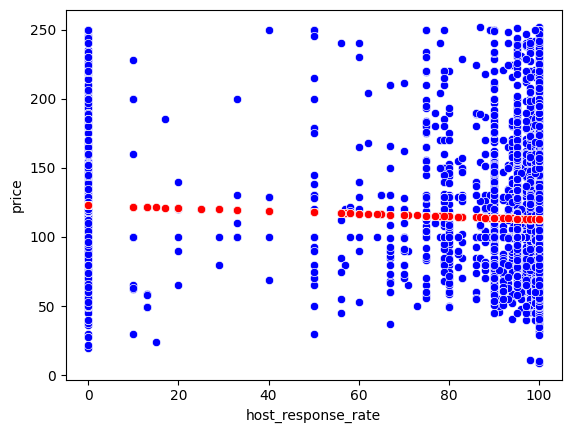

In [44]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 
sns.scatterplot(x='host_response_rate', y='price', color='blue', data=f2)
sns.scatterplot(x='host_response_rate', y='Prediccion_host_response_rate', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

<Axes: xlabel='host_is_superhost', ylabel='price'>

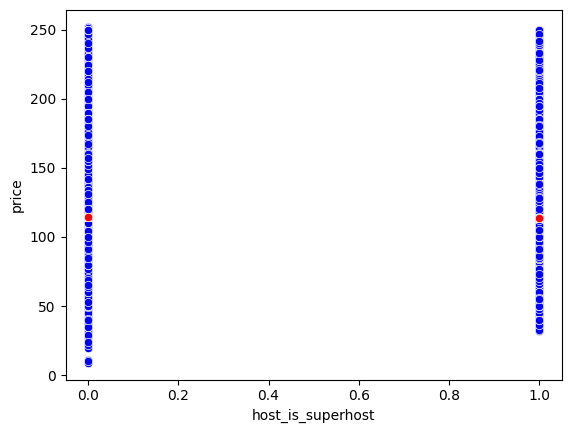

In [45]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 
sns.scatterplot(x='host_is_superhost', y='price', color='blue', data=f2)
sns.scatterplot(x='host_is_superhost', y='Prediccion_host_is_superhost', color='red', data=f2)
#sns.lineplot(x='host_is_superhost', y='Predicciones2', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

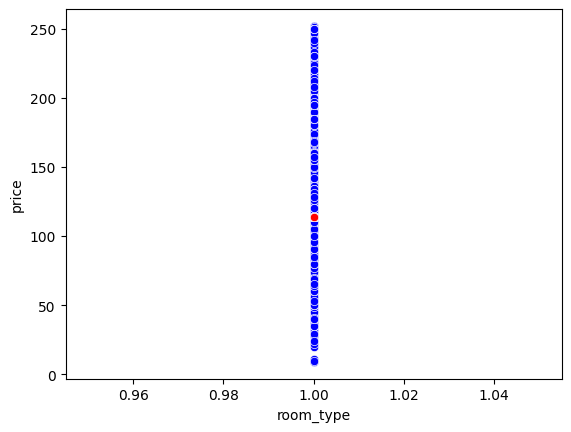

In [46]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 
sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='room_type', y='Prediccion_room_type', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

<Axes: xlabel='host_identity_verified', ylabel='price'>

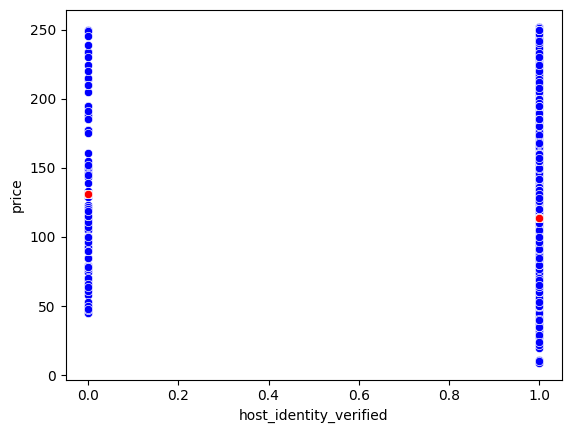

In [47]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 
sns.scatterplot(x='host_identity_verified', y='price', color='blue', data=f2)
sns.scatterplot(x='host_identity_verified', y='Prediccion_host_identity_verified', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

<Axes: xlabel='property_type', ylabel='price'>

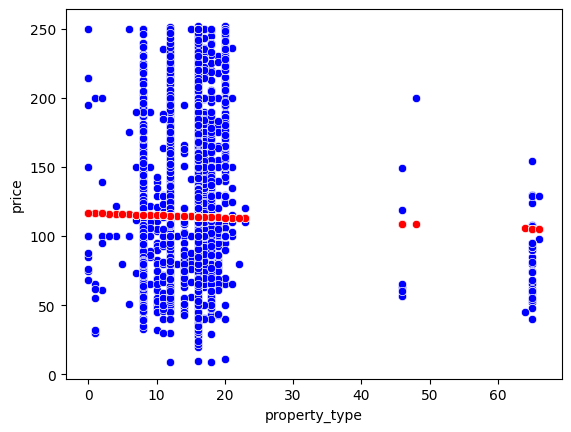

In [48]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 
sns.scatterplot(x='property_type', y='price', color='blue', data=f2)
sns.scatterplot(x='property_type', y='Prediccion_property_type', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

<Axes: xlabel='instant_bookable', ylabel='price'>

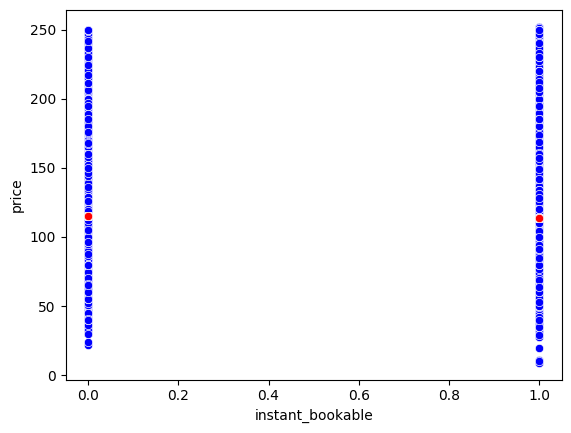

In [49]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 
sns.scatterplot(x='instant_bookable', y='price', color='blue', data=f2)
sns.scatterplot(x='instant_bookable', y='Prediccion_instant_bookable', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

<Axes: title={'center': 'Precio en relación a calificación de limpieza predecido'}, xlabel='review_scores_cleanliness', ylabel='price'>

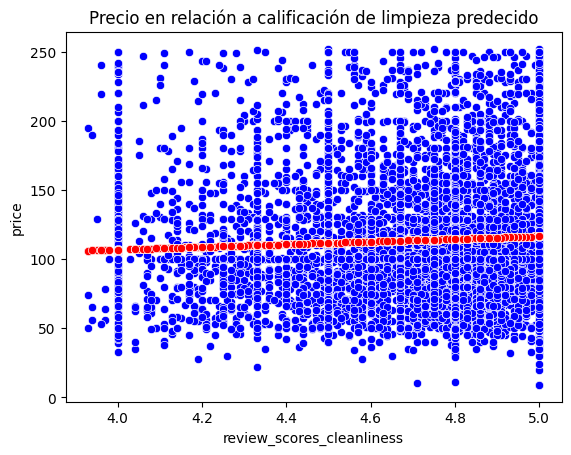

In [50]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 
plt.title("Precio en relación a calificación de limpieza predecido")
sns.scatterplot(x='review_scores_cleanliness', y='price', color='blue', data=f2)
sns.scatterplot(x='review_scores_cleanliness', y='Prediccion_review_scores_cleanliness', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

<Axes: title={'center': 'Capacidad en relación a cantidad de baños predecido'}, xlabel='bathrooms', ylabel='accommodates'>

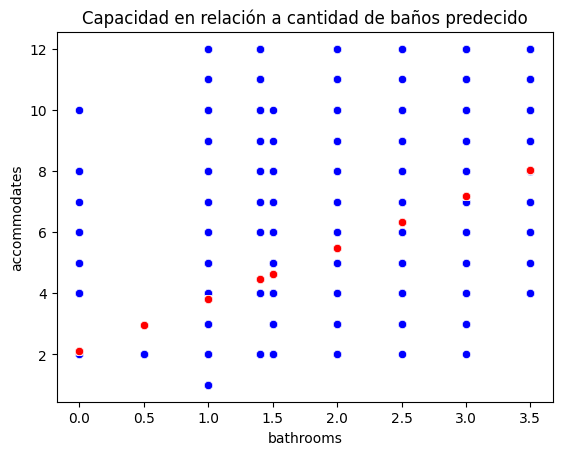

In [51]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 
plt.title("Capacidad en relación a cantidad de baños predecido")
sns.scatterplot(x='bathrooms', y='accommodates', color='blue', data=f2)
sns.scatterplot(x='bathrooms', y='Prediccion_bathrooms', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

**Coeficiente de Determinacion**

In [52]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter= model.score(X=Var_Indep, y=Var_Dep)
coef_Deter

0.004854279859211941

In [53]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter2= model2.score(X=Var_Indep2, y=Var_Dep)
coef_Deter2

0.0001080453361510525

In [54]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter3= model3.score(X=Var_Indep3, y=Var_Dep)
coef_Deter3

0.0

In [55]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter4= model4.score(X=Var_Indep4, y=Var_Dep)
coef_Deter4

0.0018605859468969754

In [56]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter5= model5.score(X=Var_Indep5, y=Var_Dep)
coef_Deter5

0.00029062609174013154

In [57]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter6= model6.score(X=Var_Indep6, y=Var_Dep)
coef_Deter6

0.00021252807265892404

In [58]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter7= model7.score(X=Var_Indep7, y=Var_Dep)
coef_Deter7

0.0032468456769607634

In [59]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter8= model8.score(X=Var_Indep8, y=Var_Dep2)
coef_Deter8

0.2472515826987084

**Coeficientes de correlacion**

In [60]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

np.float64(0.069672662208444)

In [61]:
coef_Correl2=np.sqrt(coef_Deter2)
coef_Correl2

np.float64(0.010394485853136388)

In [62]:
coef_Correl3=np.sqrt(coef_Deter2)
coef_Correl3

np.float64(0.010394485853136388)

In [63]:
coef_Correl4=np.sqrt(coef_Deter4)
coef_Correl4

np.float64(0.043134509929950236)

In [64]:
coef_Correl5=np.sqrt(coef_Deter5)
coef_Correl5

np.float64(0.01704775914131038)

In [65]:
coef_Correl6=np.sqrt(coef_Deter6)
coef_Correl6

np.float64(0.014578342589571835)

In [66]:
coef_Correl7=np.sqrt(coef_Deter7)
coef_Correl7

np.float64(0.056981099295825836)

In [67]:
coef_Correl8=np.sqrt(coef_Deter8)
coef_Correl8

np.float64(0.49724398709155687)

In [68]:
#eliminamos room_type y su prediccion 
f2= f2.drop(['room_type', 'Prediccion_room_type' ], axis=1)

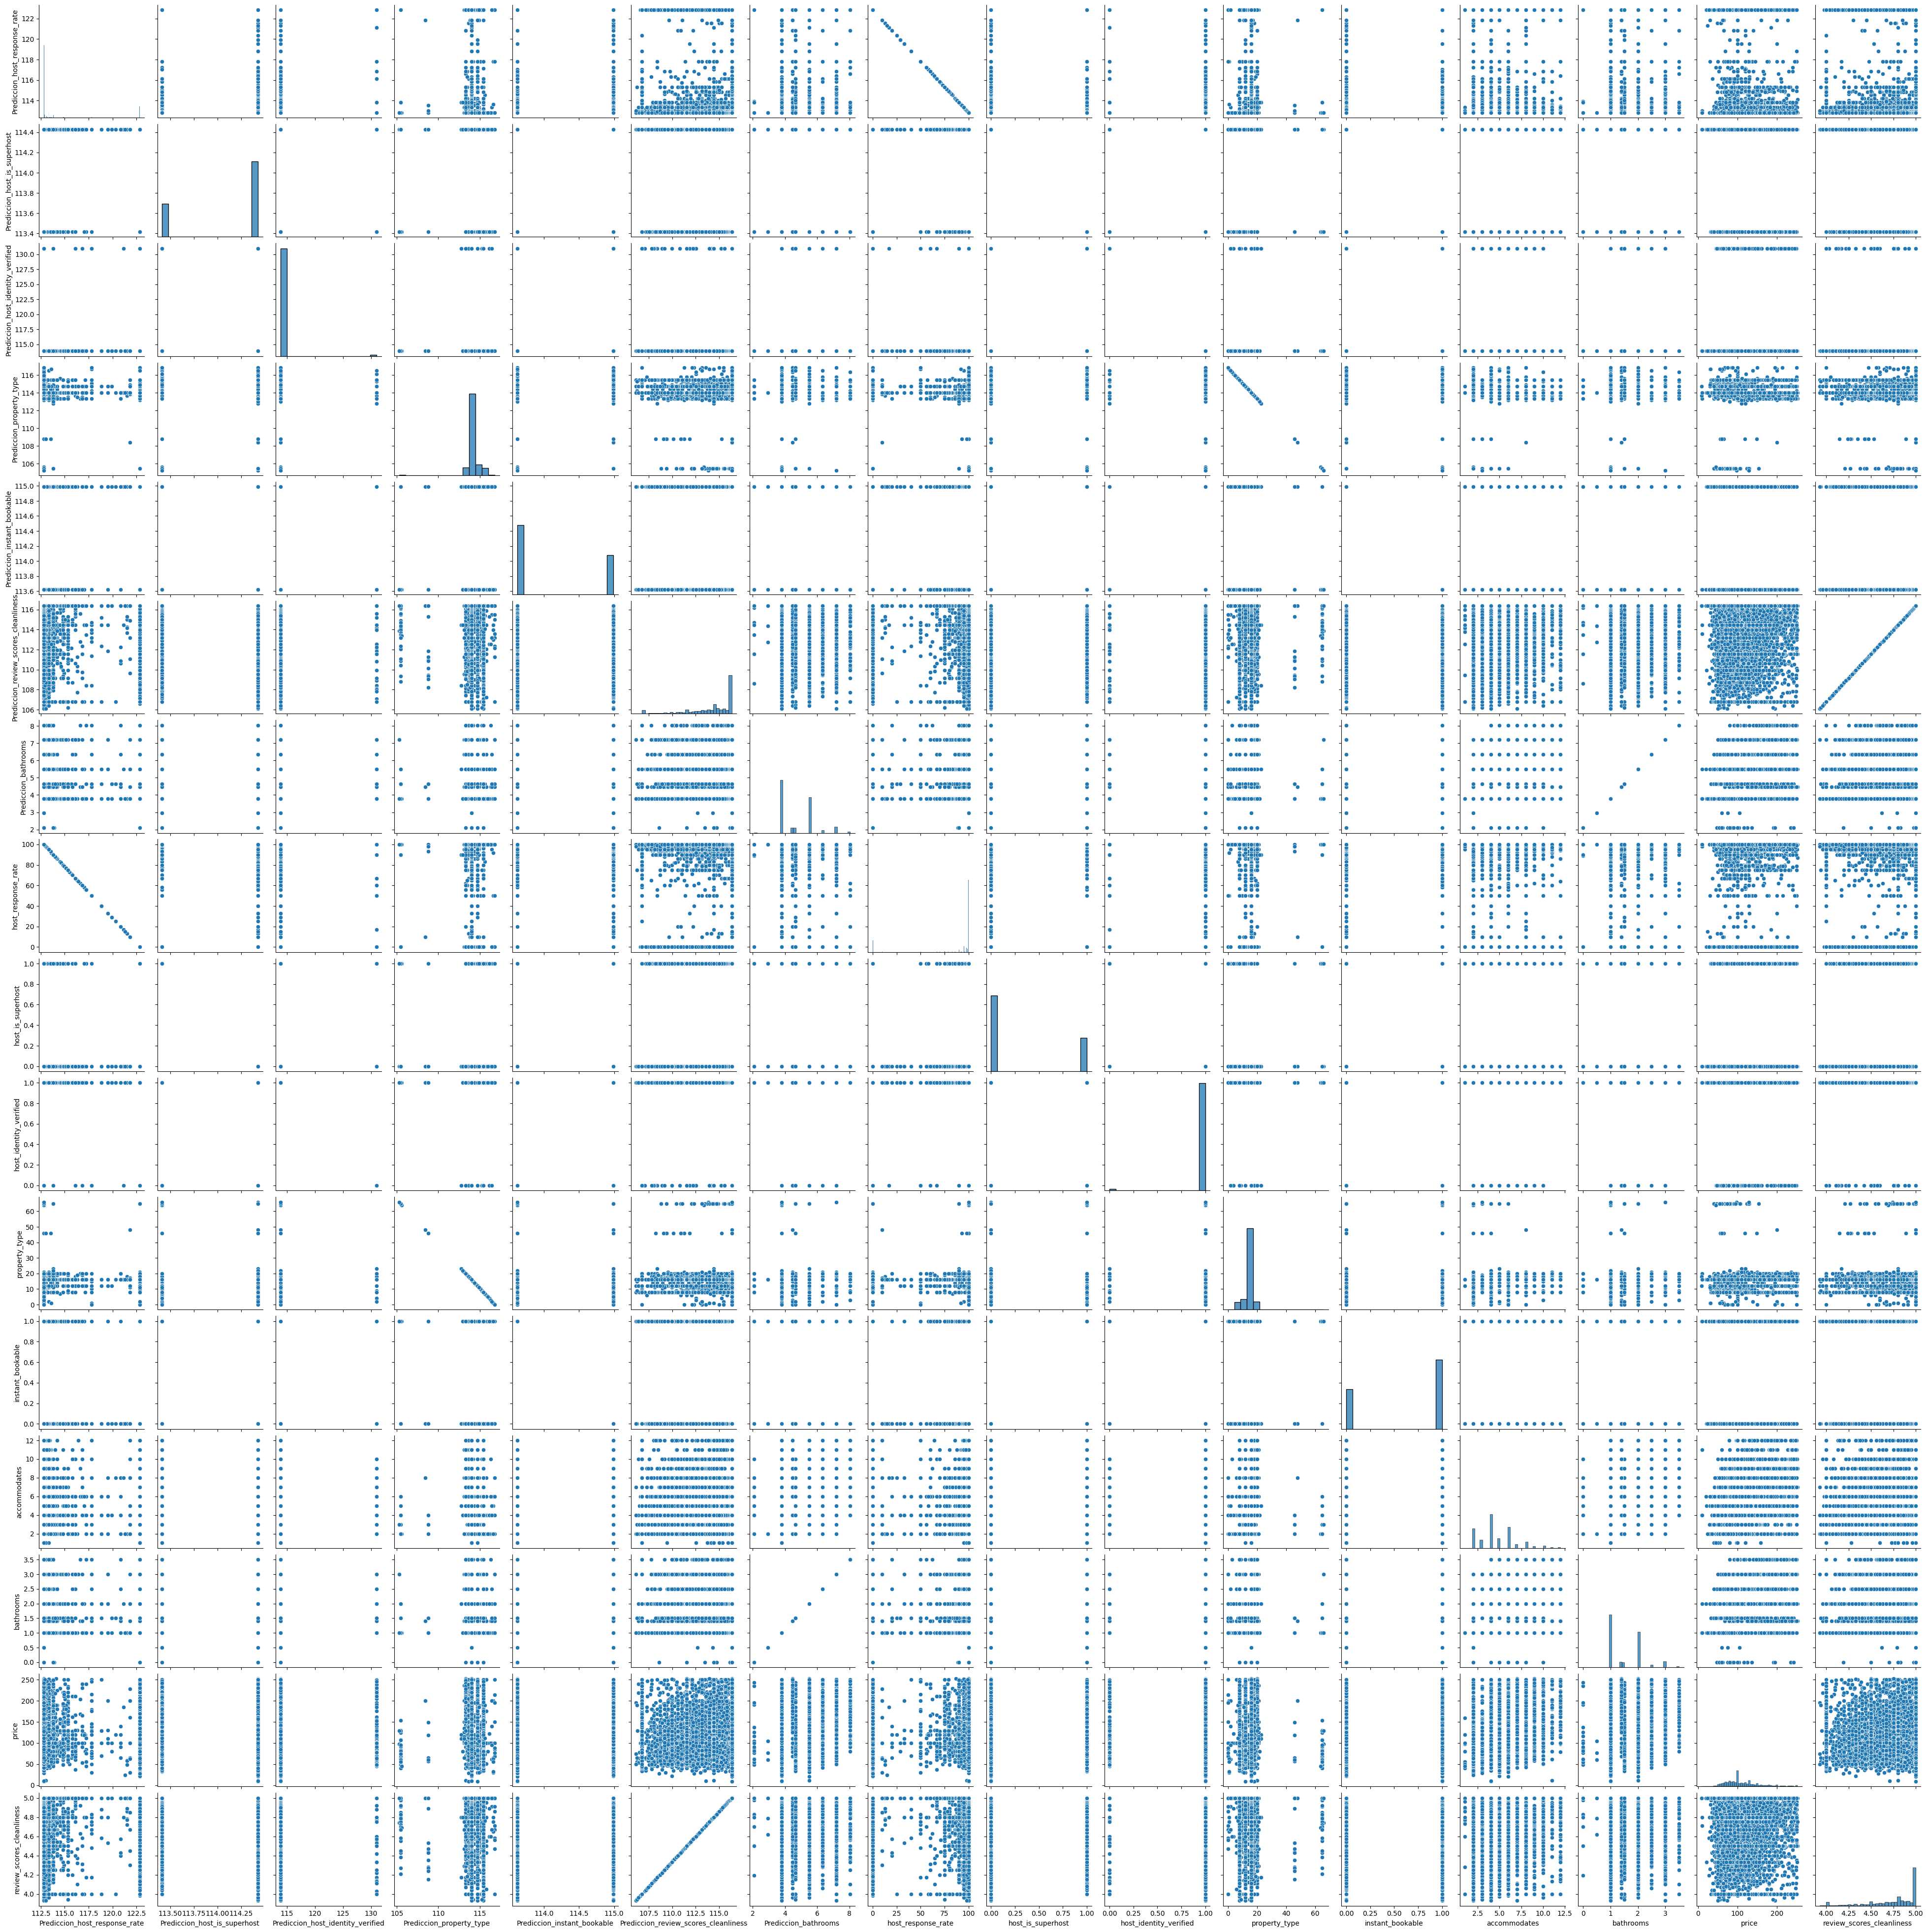

In [69]:
#Graficamos todas las dispersiones entre todas las variables
sns.pairplot(f2)

In [70]:
#Analizar categorias de una columna
df6 = f2.groupby(['host_response_rate'])['host_response_rate'].count()
df6

host_response_rate
0.0       954
10.0       26
13.0        7
15.0        1
17.0        1
20.0        5
25.0        1
29.0        2
33.0        6
40.0        5
50.0       33
56.0        6
57.0        2
58.0        3
60.0       10
62.0        2
64.0        1
65.0        5
67.0       23
70.0       18
71.0        2
73.0        1
75.0       63
77.0        4
78.0        5
79.0       44
80.0       67
82.0        7
83.0       18
86.0       27
87.0       11
88.0       31
89.0        8
90.0      203
91.0       22
92.0       35
93.0       36
94.0       43
95.0      475
96.0       36
97.0      125
98.0      341
99.0      263
100.0    5924
Name: host_response_rate, dtype: int64

In [71]:
#Encontramos todas las correlaciones entre las variables 
Corr_Factors= f2.corr()
Corr_Factors

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_host_identity_verified,Prediccion_property_type,Prediccion_instant_bookable,Prediccion_review_scores_cleanliness,Prediccion_bathrooms,host_response_rate,host_is_superhost,host_identity_verified,property_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
Prediccion_host_response_rate,1.000000,0.215116,0.002518,0.011013,0.107709,0.059060,0.003753,-1.000000,-0.215116,-0.002518,-0.011013,-0.107709,-0.002164,0.003753,0.069673,0.059060
Prediccion_host_is_superhost,0.215116,1.000000,0.061713,-0.022096,-0.006473,-0.136962,-0.000538,-0.215116,-1.000000,-0.061713,0.022096,0.006473,0.016858,-0.000538,0.010394,-0.136962
Prediccion_host_identity_verified,0.002518,0.061713,1.000000,0.007029,-0.031923,0.000891,0.034087,-0.002518,-0.061713,-1.000000,-0.007029,0.031923,0.033928,0.034087,0.043135,0.000891
Prediccion_property_type,0.011013,-0.022096,0.007029,1.000000,0.054923,0.017084,0.028733,-0.011013,0.022096,-0.007029,-1.000000,-0.054923,0.012087,0.028733,0.017048,0.017084
Prediccion_instant_bookable,0.107709,-0.006473,-0.031923,0.054923,1.000000,0.092503,-0.007190,-0.107709,0.006473,0.031923,-0.054923,-1.000000,-0.008934,-0.007190,0.014578,0.092503
Prediccion_review_scores_cleanliness,0.059060,-0.136962,0.000891,0.017084,0.092503,1.000000,0.025825,-0.059060,0.136962,-0.000891,-0.017084,-0.092503,-0.000937,0.025825,0.056981,1.000000
Prediccion_bathrooms,0.003753,-0.000538,0.034087,0.028733,-0.007190,0.025825,1.000000,-0.003753,0.000538,-0.034087,-0.028733,0.007190,0.497244,1.000000,0.293214,0.025825
host_response_rate,-1.000000,-0.215116,-0.002518,-0.011013,-0.107709,-0.059060,-0.003753,1.000000,0.215116,0.002518,0.011013,0.107709,0.002164,-0.003753,-0.069673,-0.059060
host_is_superhost,-0.215116,-1.000000,-0.061713,0.022096,0.006473,0.136962,0.000538,0.215116,1.000000,0.061713,-0.022096,-0.006473,-0.016858,0.000538,-0.010394,0.136962
host_identity_verified,-0.002518,-0.061713,-1.000000,-0.007029,0.031923,-0.000891,-0.034087,0.002518,0.061713,1.000000,0.007029,-0.031923,-0.033928,-0.034087,-0.043135,-0.000891


In [72]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_host_identity_verified,Prediccion_property_type,Prediccion_instant_bookable,Prediccion_review_scores_cleanliness,Prediccion_bathrooms,host_response_rate,host_is_superhost,host_identity_verified,property_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
Prediccion_host_response_rate,1.000000,0.215116,0.002518,0.011013,0.107709,0.059060,0.003753,1.000000,0.215116,0.002518,0.011013,0.107709,0.002164,0.003753,0.069673,0.059060
Prediccion_host_is_superhost,0.215116,1.000000,0.061713,0.022096,0.006473,0.136962,0.000538,0.215116,1.000000,0.061713,0.022096,0.006473,0.016858,0.000538,0.010394,0.136962
Prediccion_host_identity_verified,0.002518,0.061713,1.000000,0.007029,0.031923,0.000891,0.034087,0.002518,0.061713,1.000000,0.007029,0.031923,0.033928,0.034087,0.043135,0.000891
Prediccion_property_type,0.011013,0.022096,0.007029,1.000000,0.054923,0.017084,0.028733,0.011013,0.022096,0.007029,1.000000,0.054923,0.012087,0.028733,0.017048,0.017084
Prediccion_instant_bookable,0.107709,0.006473,0.031923,0.054923,1.000000,0.092503,0.007190,0.107709,0.006473,0.031923,0.054923,1.000000,0.008934,0.007190,0.014578,0.092503
Prediccion_review_scores_cleanliness,0.059060,0.136962,0.000891,0.017084,0.092503,1.000000,0.025825,0.059060,0.136962,0.000891,0.017084,0.092503,0.000937,0.025825,0.056981,1.000000
Prediccion_bathrooms,0.003753,0.000538,0.034087,0.028733,0.007190,0.025825,1.000000,0.003753,0.000538,0.034087,0.028733,0.007190,0.497244,1.000000,0.293214,0.025825
host_response_rate,1.000000,0.215116,0.002518,0.011013,0.107709,0.059060,0.003753,1.000000,0.215116,0.002518,0.011013,0.107709,0.002164,0.003753,0.069673,0.059060
host_is_superhost,0.215116,1.000000,0.061713,0.022096,0.006473,0.136962,0.000538,0.215116,1.000000,0.061713,0.022096,0.006473,0.016858,0.000538,0.010394,0.136962
host_identity_verified,0.002518,0.061713,1.000000,0.007029,0.031923,0.000891,0.034087,0.002518,0.061713,1.000000,0.007029,0.031923,0.033928,0.034087,0.043135,0.000891


<Axes: >

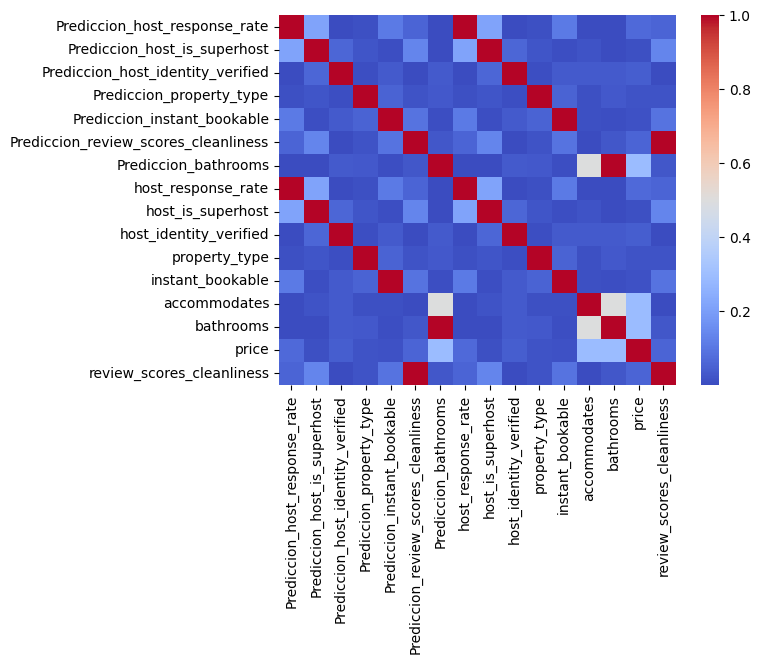

In [73]:
#Graficamos el mapa de calor de las coeficientes de correlación 
Heart_Nap = sns.heatmap(Corr_Factors1, cmap= 'coolwarm')
Heart_Nap

<Axes: >

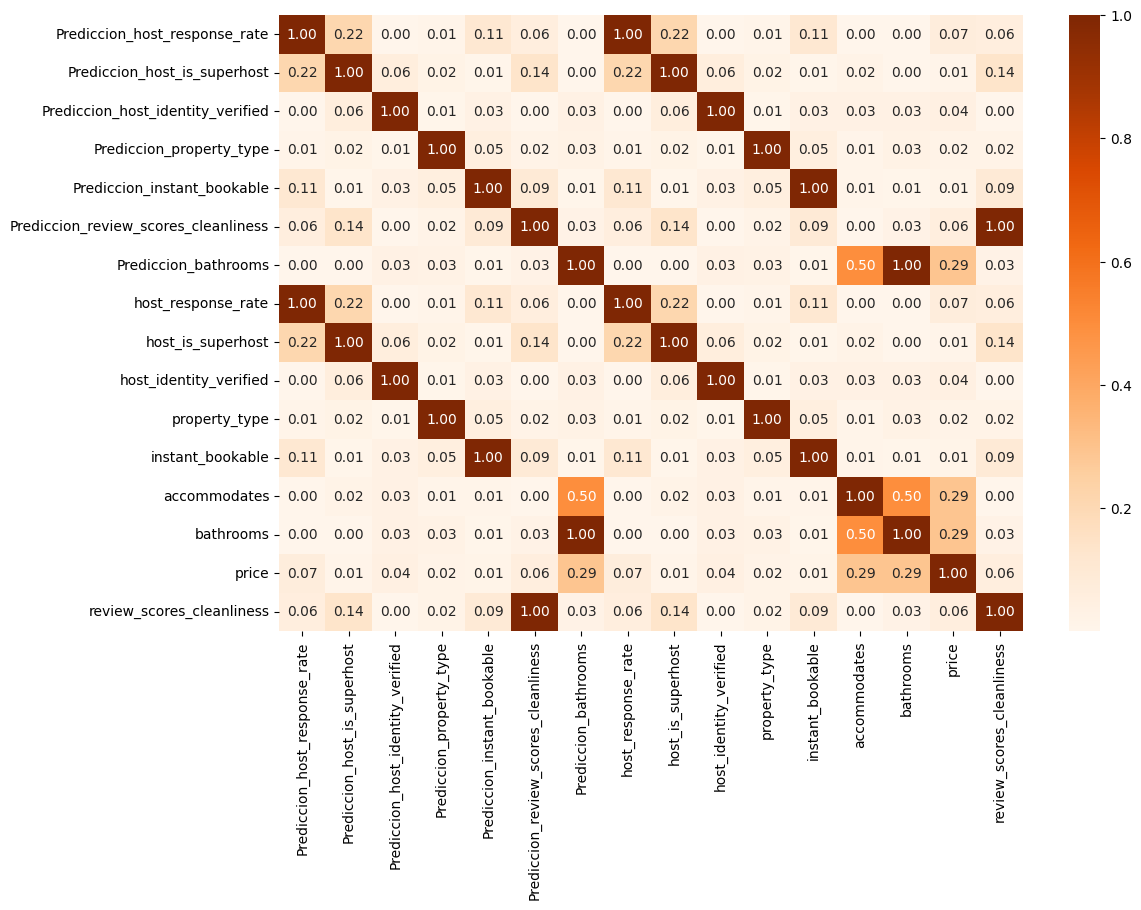

In [74]:
#Ajustamos el mapa de calor de las coeficientes de correlación 
plt.figure(figsize=(12,8))
Heart_Nap = sns.heatmap(Corr_Factors1, cmap= 'Oranges', annot=True, fmt=".2f")
Heart_Nap

In [75]:
# Obtener R² de cada modelo
r2_1 = model.score(Var_Indep, Var_Dep)
r2_2 = model2.score(Var_Indep2, Var_Dep)
r2_3 = model3.score(Var_Indep3, Var_Dep)
r2_4 = model4.score(Var_Indep4, Var_Dep)
r2_5 = model5.score(Var_Indep5, Var_Dep)
r2_6 = model6.score(Var_Indep6, Var_Dep)
r2_7 = model7.score(Var_Indep7, Var_Dep)
r2_8 = model8.score(Var_Indep8, Var_Dep2)

# Guardar los resultados en un diccionario
r2_values = {
    "host_response_rate": r2_1,
    "host_is_superhost": r2_2,
    "room_type": r2_3,
    "host_identity_verified": r2_4,
    "property_type": r2_5,
    "instant_bookable": r2_6,
    "review_scores_cleanliness": r2_7,
    "bathrooms": r2_8
}

# Ordenar y mostrar las 3 mejores variables
top_3 = sorted(r2_values.items(), key=lambda x: x[1], reverse=True)[:3]
print("Las 3 variables con mayor correlación son:")
for variable, r2 in top_3:
    print(f"{variable}: R² = {r2:.4f}")

Las 3 variables con mayor correlación son:
bathrooms: R² = 0.2473
host_response_rate: R² = 0.0049
review_scores_cleanliness: R² = 0.0032
